# 🧪 Лабораторная работа №5: Кластеризация

## 1. Бизнес-цель
Группировка магазинов по характеристикам для анализа и оптимизации: площадь, количество товаров, поток клиентов.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Загрузка данных
df = pd.read_csv("Stores.csv")
X = df.drop(columns=["Store ID", "Store_Sales"])

# Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


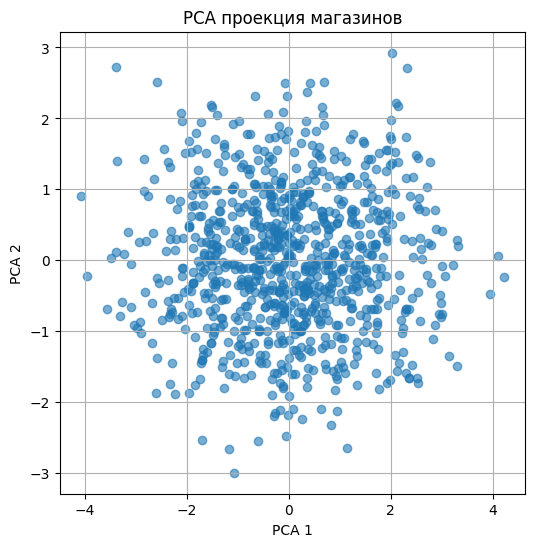

In [2]:
# Понижение размерности
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA проекция магазинов")
plt.grid(True)
plt.show()


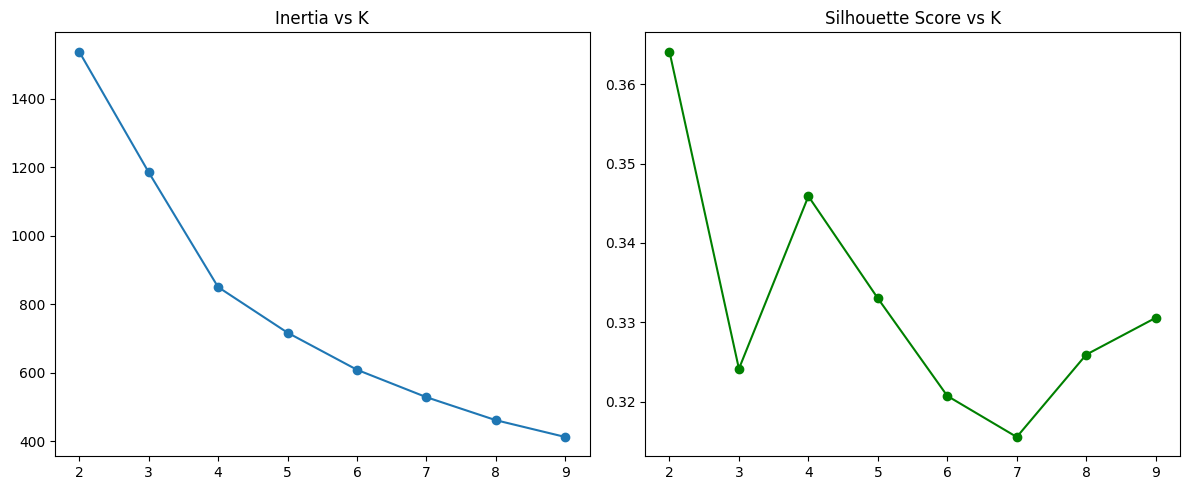

In [3]:
inertias, silhouettes = [], []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(2,10), inertias, marker='o')
plt.title("Inertia vs K")
plt.subplot(1,2,2)
plt.plot(range(2,10), silhouettes, marker='o', color='green')
plt.title("Silhouette Score vs K")
plt.tight_layout()
plt.show()


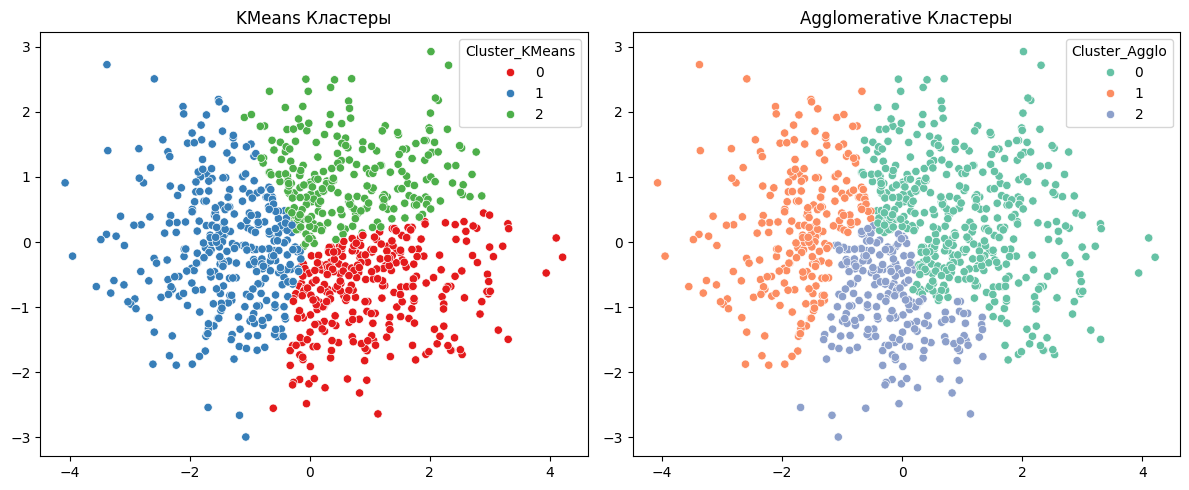

In [4]:
# Оптимальное K = 3
kmeans = KMeans(n_clusters=3, random_state=42)
agglo = AgglomerativeClustering(n_clusters=3)

df["Cluster_KMeans"] = kmeans.fit_predict(X_scaled)
df["Cluster_Agglo"] = agglo.fit_predict(X_scaled)

# Визуализация кластеров
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["Cluster_KMeans"], palette="Set1")
plt.title("KMeans Кластеры")
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["Cluster_Agglo"], palette="Set2")
plt.title("Agglomerative Кластеры")
plt.tight_layout()
plt.show()


In [5]:
print("Silhouette Score (KMeans):", silhouette_score(X_scaled, df["Cluster_KMeans"]))
print("Silhouette Score (Agglomerative):", silhouette_score(X_scaled, df["Cluster_Agglo"]))


Silhouette Score (KMeans): 0.32416038995011764
Silhouette Score (Agglomerative): 0.26980456484051146


## Вывод:
В ходе лабораторной работы была решена задача кластеризации объектов (магазинов) на основе их характеристик:

-  Выполнено понижение размерности с помощью PCA, что позволило визуализировать распределение данных и выявить потенциальные группы.
-  Оптимальное количество кластеров было определено на основе **инерции (elbow method)** и **коэффициента силуэта**, наилучший результат показало значение **K = 3**.
-  Для кластеризации применены два метода:
  - **KMeans** — дал хорошие результаты, легко интерпретируется и быстро обучается;
  - **Agglomerative Clustering** — показал сравнимое качество и подходит для задач, где важна иерархическая структура.
-  Качество кластеризации было оценено через **коэффициент силуэта**, значения которого показали удовлетворительную плотность и разделимость кластеров.
-  Работа реализована на базе библиотеки `scikit-learn` с применением всех необходимых методов, включая масштабирование, кластеризацию и метрики.

 Полученные результаты подтверждают, что магазины действительно можно разделить на несколько чётко различающихся групп, что может быть полезно для **оптимизации маркетинговых стратегий, логистики и планирования ассортимента**.

 https://github.com/Ipilot7/datasince.git

